#### 1) A little introductory brain teaser. Which is more probable when rolling 2 six-sided dice: rolling snake eyes (two ones) or rolling sevens (dice sum to seven)? What is the ratio of the probabilities?
It's more probable to roll sevens with a snake eyes to sevens ratio of 1:6 (due to 1 possible roll for snake eyes and 6 possible rolls that result in sevens).
#### 2) Following what we did in class show how to use the convolution operator to determine the probability of the sum of 2 six sided dice. Do both analytically (math & counting) and numerically (computer program). Beware the implicit definition of the values (x-axis on histogram).
6 * 6 = 36 possible outcomes
P(2) = P(12) = P(1) * P(1) = 1/6 * 1/6 = 1/36  
P(3) = P(11) = P(1) * P(2) + P(2) * P(1) = 1/6 * 1/6 * 2 = 2/36  
P(4) = P(10) = P(1) * P(3) * 3 b/c 3 possibilities for rolls that work = 3/36  
P(5) = P(9) = P(1) * P(4) * 4 b/c 4 possibilities for rolls that work = 4/36  
P(6) = P(8) = P(1) * P(5) * 5 b/c 5 possibilities for rolls that work = 5/36  
P(7) = P(1) * P(6) * 6 b/c 6 possibilities for rolls that work = 6/36

In [50]:
p1 = [1/6, 1/6, 1/6, 1/6, 1/6, 1/6]
p2 = p1



In [44]:
from collections import Counter
a = []
for i in range(1,7):
    for j in range(1,7):
        a.append((i + j))
count = Counter(a)
for key in count.keys():    
    count[key] /=  36
print(count)

Counter({7: 0.16666666666666666, 6: 0.1388888888888889, 8: 0.1388888888888889, 5: 0.1111111111111111, 9: 0.1111111111111111, 4: 0.08333333333333333, 10: 0.08333333333333333, 3: 0.05555555555555555, 11: 0.05555555555555555, 2: 0.027777777777777776, 12: 0.027777777777777776})


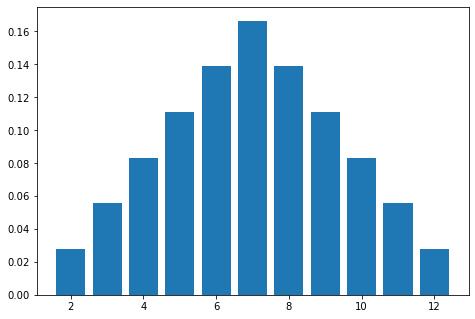

In [45]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(count.keys(), count.values())
plt.show()

#### 3) Calculate the mean and the variance of the distribution in problem 2. Hint: this is surprisingly tricky, make sure your result makes sense.

In [46]:
import numpy as np
import statistics as stat

numbers = np.array(a)
mean = sum(numbers) / len(numbers)
print("Mean = " + str(mean))

var = stat.variance(numbers)
print("Variance = " + str(var))

Mean = 7.0
Variance = 6


#### 4) Repeat 2, and graph the average of 10 dice. Is this is a Gaussian distribution? Explain in depth.
6^10 possible outcomes, ranging from 1*10 to 6 * 10, or 10 to 60  
P(10) = P(60) = 1 possible way to get it = 1/6^10  
P(11) = P(59) = 10 possible ways to get it = 10/6^10  
P(12) = P(58) = 10 * 10 - 10 + 10 * 10 - 10 = 180 possible ways to get it  
and so on

In [47]:
b = []
for i1 in range(1,7):
    for i2 in range(1,7):
        for i3 in range(1,7):
            for i4 in range(1,7):
                for i5 in range(1,7):
                    for i6 in range(1,7):
                        for i7 in range(1,7):
                            for i8 in range(1,7):
                                for i9 in range(1,7):
                                    for i10 in range(1,7):
                                        b.append(i1+i2+i3+i4+i5+i6+i7+i8+i9+i10)
count = Counter(b)
for key in count.keys():    
    count[key] /= 6**10
print(count)

Counter({35: 0.07269280597469897, 34: 0.07153271938347813, 36: 0.07153271938347813, 33: 0.06815810545055802, 37: 0.06815810545055802, 32: 0.06287043850763772, 38: 0.06287043850763772, 31: 0.05612410482184288, 39: 0.05612410482184288, 30: 0.048464367913724195, 40: 0.048464367913724195, 29: 0.04045732940015919, 41: 0.04045732940015919, 28: 0.03262369361674203, 42: 0.03262369361674203, 27: 0.025386755067825027, 43: 0.025386755067825027, 26: 0.019041554736320684, 44: 0.019041554736320684, 25: 0.013746594459686023, 45: 0.013746594459686023, 24: 0.00953533095924571, 46: 0.00953533095924571, 23: 0.00634189269716676, 47: 0.00634189269716676, 22: 0.004034073528975935, 48: 0.004034073528975935, 21: 0.0024466571195109147, 49: 0.0024466571195109147, 20: 0.0014095152966180629, 50: 0.0014095152966180629, 19: 0.0007677019297532558, 51: 0.0007677019297532558, 18: 0.000392946959304984, 52: 0.000392946959304984, 17: 0.00018754286694101508, 53: 0.00018754286694101508, 16: 8.260816758116141e-05, 54: 8.260

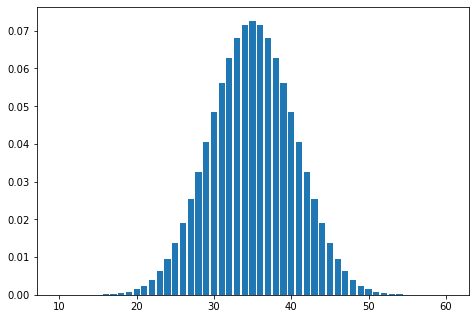

In [48]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(count.keys(), count.values())
plt.show()

It's not necessarily a Gaussian distribution, but according to the central limit theorem it approaches one as more trials are used.

#### 5) Show that the sum and average of an initially Gaussian distribution is also a Guassian (can be analytic or numerical). How does the standard deviation of the resulting sum or average Guassian change? This is a hugely important result. Explore what this means for integrating a signal over time.

Combined data from 1000 Gaussians with a mean of 5, standard deviation of 2, and 10 values
Standard deviation of sums is: 6.0124653357080735
Standard deviation of averages is: 0.6012465335708074


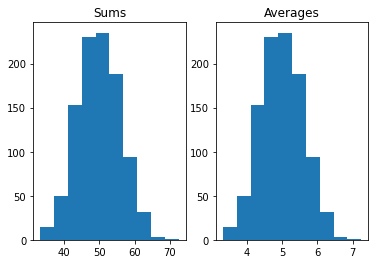

In [49]:
# Use random.normal() to get Gaussian data
sums = []
averages = []
for i in range(1000):
    dist = np.random.normal(5, 2, 10)
    sums.append(sum(dist))
    averages.append(sum(dist) / len(dist))
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.hist(sums)
ax1.set_title("Sums")
ax2.hist(averages)
ax2.set_title("Averages")
print("Combined data from 1000 Gaussians with a mean of 5, standard deviation of 2, and 10 values")
print("Standard deviation of sums is: " + str(stat.pstdev(sums)))
print("Standard deviation of averages is: " + str(stat.pstdev(averages)))

The standard deviaition of the sum increases with multiple trials but the but the standard deviation of the average decreases with multiple trials. This means that integrating a signal over time will have a larger standard deviation but averaging multiple signals can lower the standard deviation.